In [5]:
%%html
<style> 
table {display: block;} 
td {
  font-size: 18px
}
.rendered_html { font-size: 18px; }
*{ line-height: 200%; }
</style>

# Natural Language Processing and the Web WS 2022/23 - Practice Class - <span style="color:blue">Tutorial 2</span>

## Content
In this practice class, we will discuss the following main points
* How to  <span style="color:blue">read/write</span> text data from/to a file system and web page 
* Text  <span style="color:blue">Segmentation</span>,  <span style="color:blue">lemmatization</span>,  <span style="color:blue">stemming</span>
* <span style="color:blue">Part of speech tagging</span> using NLTK

To run this notebook, login to Moodle, click <span style="color:blue">nlp4web tutorial2</span>. This will download ch2.zip that you have to unzip to your preferred location. Start <span style="color:blue">Anaconda navigation</span>, open <span style="color:blue">Jupyter notebook</span> and navigate to the ch2 folder you have unzipped and open <span style="color:blue">ch2.ipynb</span> file

## How to read/read data from a file system
To open an existing file, you can do it as follows
> ` file = open("filename", "r")`

You can then get the content as 
> `file.read()`

If you want to handle some special characters encodings, you need to open the file with the given encodings. For example, to open the file with  <span style="color:blue">UTF-8</span> encoding

>``` python
import io
file = io.open("filename", mode="r", encoding="utf-8") 
```

If you want to read the file line by line, you can do it as follows

>``` python
file = open("filename", "r")
for line in file:
    print (line) 


To read multiple files from a folder or sub folders, you can do it as follows

>``` python
import os
files = os.lisdir("foldername") 
```

Or using <span style="color:blue">os.scandir</span>

> ``` python
 import os
 with os.scandir("foldername") as files
 for file in files:
   print(file.name) 
   ```

In [6]:
# Install chardet library to detect the encoding of a text
!pip install chardet

  Using cached chardet-5.0.0-py3-none-any.whl (193 kB)


In [7]:
#Checking the encoding of a file
import chardet 
def detect_encoding(file):
    with open(file,'rb') as raw_data:
        result = chardet.detect(raw_data.read())
        return(result)

In [8]:
print(detect_encoding("data/news/news.txt"))
print(detect_encoding("data/news/news4.txt"))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [9]:

# Open file for reading ("r)"
file = open("data/test.txt","r")
# Print all the content
print("All content:", file.read())
file.close()
# Iterate line by line
file = open("data/test.txt","r")
print("Prinitng line by line ...")
for line in file:
   print(line)
file.close()

All content: This is line one.
And this is line two.
Prinitng line by line ...
This is line one.

And this is line two.


In [10]:
import io
file = io.open("data/news/news4.txt", mode="r", encoding="utf-8")
file.read()

'የፋይናንስ ኢንዱስትሪውን በ500 ሚሊዮን ብር የተከፈለ ካፒታል የሚቀላቀለው አማራ ባንክ\n21 August 2019\nዳዊት ታዬ\nበፋይናንስ ኢንዱስትሪው ውስጥ 2011 ዓ.ም. በተለየ የሚታይበትን ክስተት አስተናግዷል፡፡ ይህም የኢትዮጵያ ብሔራዊ ባንክ ለማቋቋም የሚጠይቀውን የተከፈለ ካፒታል መጠን ከ100 ሚሊዮን ብር ወደ 500 ሚሊዮን ብር ካሳደገ ወዲህ፣ ላለፉት ሰባት ዓመታት አንድም ባንክ አሳይቋቋም ቆይቶ ዘንድሮ ግን ሰባት ያህል ባንኮች ለምሥረታ መዘጋጀታቸው ነው፡፡ እነዚህ ባንኮች በአዲሱ ዓመት ወደ ሥራ እንደሚገቡ በማስታወቅ የአክሲዮን ሽያጭ ውስጥ ገብተዋል፡፡ በዕቅዳቸው መሠረት ከተጓዙ በቀጣዩ ዓመት የአገሪቱ ባንኮች ቁጥር ወደ 25 ያድጋል፡፡ እስከ ቀጣዩ ዓመት አጋማሽ ድረስ ወደ ሥራ ለመግባት ካቀዱትና በወራት ውስጥ የአክሲዮን ሽያጫቸውን ጨርሰው የባንክ ኢንዱስትሪውን እንደሚቀላቀሉ ካስታወቁት ውስጥ አንዱ፣ አማራ ባንክ አክሲዮን ማኅበር ነው፡፡ በሁለት ቢሊዮን ብር የተፈቀደ ካፒታልና በ500 ሚሊዮን ብር የተከፈለ ካፒታል ወደ ሥራ እገባለሁ ያለውን አማራ ባንክ አደራጅ ኮሚቴውን በሰብሳቢነት የሚመሩት፣ የገቢዎችና ጉምሩክ ባለሥልጣን የቀድሞ ዋና ዳይሬክተር አቶ መላኩ ፈንታ ናቸው፡፡ የባንኩ የፕሮጀክት አስተባባሪ በመሆን የተሰየሙት ደግሞ የቀድሞ የልማት ባንክ ምክትል ፕሬዚዳንት፣ ከዚያም የዓባይ ባንክ የመጀመርያዋ ፕሬዚዳንት ወ/ሮ መሰንበት ሸንቁጥ ናቸው፡፡ ወ/ሮ መሰንበት የአዲስ አበባ ንግድና ዘርፍ ማኅበራት ምክር ቤት ፕሬዚዳንት በመሆንም እያገለገሉ ነው፡፡ አማራ ባንክ ቅዳሜ ነሐሴ 11 ቀን 2011 ዓ.ም. የአክሲዮን ሽያጩን በይፋ የጀመረበት ሥነ ሥርዓት ላይ በክብር እንግድነት ተገኝተው ንግግር ያደረጉት፣ በምክትል ርዕሰ መስተዳደር ማዕረግ የአማራ ክል

In [11]:
import os
folder = "./data/"
with os.scandir(folder) as files:
    for file in files:
        print(file.name)

country_capital.csv
names2.csv
simple-documents
names.csv
news
test.txt


## Writing to a file
You can write text data to a file as follows:

> ``` python
file = open("filename","w")
file.write("content")
file.close() 
```


If you want to append to an existing file,

>``` python
file = open("filename", "a")
file.write("content to append")
```

In [12]:
# Write to a file "testout.txt", if the file does not exist, create it in the current directory
file = open("testout.txt", "w")
file.write("This is the first line\n")
file.close()

# Append content to the "testout.txt" file
file = open("testout.txt", "a")
file.write("This is the second appended line\n")
file.close()


## How to read data from web page content
The standard <span style="color:blue">requests</span> library can be  used to retrieve content from a web page. Lets see some of the methods for the <span style="color:blue">GET</span> HTTP action. A better way of retrieving web content will be discussed later, mainly using different packages.

In [13]:
# requests is the standard html library to make HTTP requests
import requests
link1 = "https://en.wikipedia.org/wiki/Natural_language_processing"

# get is an HTTP method to retrieve data from a specified resource
# response is an HTTP "Response" object to inspect the request
response = requests.get(link1)
# HTTP status code, example 200 is an ok status, 404 is not found status code
status = response.status_code
print(status)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


200


In [14]:
# the information obtained from the resource, a payload in the form of bytes
content = response.content
print (type(content))
print("====")
print (content)

<class 'bytes'>
====
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Natural language processing - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fda0e0a3-5ed9-4d81-bb46-2a98113564af","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1112038569,"wgRevisionId":1112038569,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All accuracy disputes","Accuracy disputes from December 2013","CS1 maint: location","

In [15]:
# the information obtained from the resource, a payload in the form of string
content = response.text

print (type(content))
print("====")
print (content)

<class 'str'>
====
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Natural language processing - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fda0e0a3-5ed9-4d81-bb46-2a98113564af","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1112038569,"wgRevisionId":1112038569,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All accuracy disputes","Accuracy disputes from December 2013","CS1 maint: location","Articles 

In [16]:
# Examine which encoding the request determines for the response
encoding = response.encoding
print(encoding)

UTF-8


In [17]:
# Spacify the encoding of the response manually
response.encoding = "utf-8"

# Examine all the header information
headers = response.headers
print (headers)

{'date': 'Sat, 29 Oct 2022 13:51:31 GMT', 'vary': 'Accept-Encoding,Cookie,Authorization', 'server': 'ATS/9.1.3', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'last-modified': 'Wed, 26 Oct 2022 14:01:23 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '25832', 'x-cache': 'cp3052 hit, cp3058 hit/43', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp3058"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=29-Oct-2022;Path=/;HttpOnly;secure;Expires=Wed, 30 Nov 2022 12:00:00 GMT, WMF-Last-Access-Global=29-Oct-2022;Path=/;Doma

In [18]:
# determine the type of the content. For example, if you chose link1, it is an html type while link2 is json
contentType = response.headers.get('content-type')
print(contentType)

text/html; charset=UTF-8


In [19]:
link2 = "https://api.github.com"

# get is an HTTP method to retrieve data from a specified resource
# response is an HTTP "Response" object to inspect the request
response = requests.get(link2)
# HTTP status code, example 200 is an ok status, 404 is not found status code
status = response.status_code
print(status)

200


In [20]:
# the information obtained from the resource, a payload in the form of bytes
content = response.content
print (content)

b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sea

In [21]:
headers = response.headers
print(headers)
print("====")
contentType = response.headers.get('content-type')
print(contentType)

{'Server': 'GitHub.com', 'Date': 'Sat, 29 Oct 2022 21:01:57 GMT', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': '"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-src 'none'", 'Content-Type': 'application/json; charset=utf-8', 'X-GitHub-Media-Type': 'github.v3; format

## print a formated content using `pprint`

In [22]:
import pprint
json = response.json()
pprint.pprint(json)

{'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'current_user_repositories_url': 'https://api.github.com/user/repos{?type,page,per_page,sort}',
 'current_user_url': 'https://api.github.com/user',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={q

## File/Webpage processing using <span style="color:blue">BeautifulSoup</span> library.
This library can be used to process HTML and XML files.

In [23]:
# Install bs4 package
!pip install beautifulsoup4

In [24]:
# Reading web content using BeautifulSoup
from bs4 import BeautifulSoup
page = requests.get("https://www.crummy.com/software/BeautifulSoup/")
soup = BeautifulSoup(page.content, 'html.parser')
# Display the content of the page - html
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [25]:
# Get only the text content of the page
print(soup.text)





Beautiful Soup: We called him Tortoise because he taught us.









[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup c

In [26]:
# list all the available elements in the page
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [27]:
# The third (index 2) element is the HTML tag 
print(list(soup.children)[2].name)
# get the sub-tags unde the HTML tag
html = list(soup.children)[2]
list(html.children) # contains the head and body sub tags

html


['\n',
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Beautiful Soup: We called him Tortoise because he taught us.</title>
 <link href="mailto:leonardr@segfault.org" rev="made"/>
 <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
 <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
 <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
 <meta content="Leonard Richardson" name="author"/>
 </head>,
 '\n',
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
 <style>
 #tidelift { }
 
 #tidelift a {
  border: 1px solid #666666;
  margin-left: auto;
  padding: 10px;
  text-decoration: none;
 }
 
 #tidelift .cta {
  background: url("tidelift.svg") no-repeat;
  padding-left: 30px;
 }
 </style>
 <img align="right" src="10.1.jpg" width="250"/><br/>
 <p>[ <a href="#Download">Download</a> | <a href="bs4/doc/">Documentation</a> | <a hr

In [28]:
body = list(html.children)[3]

In [29]:
# Get all the sub-tags under body
for tag in list(body.children):
    if tag.name:
        print (tag.name)

style
img
br
p
div
p
p


In [30]:
# Get all the text under the p tags
for tag in list(body.children):
    if tag.name and tag.name =='p':
        #pass  # uncomment the following line
        print (tag.text)
# OR use findall by the tag name
print("=======USing find all======")
#for p in soup.find_all('p'):
#    print(p.text)

[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]
You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup can't detect one. Then you just have to specify the
original encoding.

Beautiful Soup sits 

## Reading and  writing <span style="color:blue">CSV</span> files.
CSV files are comma delimited files that can be used to store structured files in the form of lists. It might contain headers, and the header as well as individual records are separated by new lines. In general delimiters can be also user defined.

You can use the <span style="color:blue">csv<span> library to process CSV  files.
>``` import csv```
    

In [31]:
# Read personal information: name.csv is obtained from https://github.com/CoreyMSchafer/code_snippets/blob/master/Python-CSV/names.csv
import csv
with open('data/names.csv','r') as csv_names:
    name_reader = csv.reader(csv_names,delimiter=',')
    # skip the header
    next(name_reader)
    for name in name_reader:
        print(name)

['John', 'Doe', 'john-doe@bogusemail.com']
['Mary', 'Smith-Robinson', 'maryjacobs@bogusemail.com']
['Dave', 'Smith', 'davesmith@bogusemail.com']
['Jane', 'Stuart', 'janestuart@bogusemail.com']
['Tom', 'Wright', 'tomwright@bogusemail.com']
['Steve', 'Robinson', 'steverobinson@bogusemail.com']
['Nicole', 'Jacobs', 'nicolejacobs@bogusemail.com']
['Jane', 'Wright', 'janewright@bogusemail.com']
['Jane', 'Doe', 'janedoe@bogusemail.com']
['Kurt', 'Wright', 'kurtwright@bogusemail.com']
['Kurt', 'Robinson', 'kurtrobinson@bogusemail.com']
['Jane', 'Jenkins', 'janejenkins@bogusemail.com']
['Neil', 'Robinson', 'neilrobinson@bogusemail.com']
['Tom', 'Patterson', 'tompatterson@bogusemail.com']
['Sam', 'Jenkins', 'samjenkins@bogusemail.com']
['Steve', 'Stuart', 'stevestuart@bogusemail.com']
['Maggie', 'Patterson', 'maggiepatterson@bogusemail.com']
['Maggie', 'Stuart', 'maggiestuart@bogusemail.com']
['Jane', 'Doe', 'janedoe@bogusemail.com']
['Steve', 'Patterson', 'stevepatterson@bogusemail.com']
['Dav

In [32]:
# Re-write the csv file with a different delimiter
with open('data/names.csv','r') as csv_names:
    name_reader = csv.reader(csv_names,delimiter=',')
    with open('data/names2.csv','w') as csv_names:
        name_writer = csv.writer(csv_names, delimiter="\t")
        for name in name_reader:
            name_writer.writerow(name)
    

---
---
##  <span style="color:red"> Excercise_1  ( 3pt)</span>
1. List all the files in the subidirectories of the <span style="color:blue">data</span> folder that you have downloaded from Moodle. (<span style="color:red">0.5 pt</span>)
1. Merge all the news content into a single file and save into a different file named <span style="color:blue">allnews.txt</span> using the ISO-8859-1 encoding. (<span style="color:red">0.5 pt</span>)
1. Read the country name and capital city from the [this](https://geographyfieldwork.com/WorldCapitalCities.htm) page, which lists the world capital cities with their country. Save the result as a <span style="color:blue">comma separated value (csv)</span> file format.(<span style="color:red">2 pts</span>)
---
---

# 1.1

In [1]:
from glob import glob
print('Files in data folder:')
for file in glob('data/*/*'):
    print(file)

Files in data folder:
data\news\allnews.txt
data\news\news.txt
data\news\news2.txt
data\news\news3.txt
data\news\news4.txt
data\news\news5.txt
data\simple-documents\alice.txt
data\simple-documents\dracula.txt
data\simple-documents\siddhartha.txt


# 1.2

In [2]:
from glob import glob
with open('data/news/allnews.txt', 'w', encoding='ISO-8859-1') as f:
    for file in glob('data/news/*'):
        with open(file, 'r', encoding='ISO-8859-1') as g:
            f.write(g.read())

# 1.3

In [3]:
import csv
import requests
from bs4 import BeautifulSoup
url = 'https://geographyfieldwork.com/WorldCapitalCities.htm'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
country_capital = {'Country': 'Capital City'}
for i, p in enumerate(soup.find_all('td')):
    if i % 2 == 0:
        text = p.text
        if text[0].isalpha():
            country_capital[text] = soup.find_all('td')[i + 1].text
with open('data/country_capital.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in country_capital.items():
        writer.writerow([key, value])

# Tokenization
Tokenization is the first step in almost all NLP applications. It is an important prerequisite for a number of downstream NLP tasks. Consider the following example:
> ``` xx
Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing.```

For <span style="color:blue">O'Neill</span> and <span style="color:blue">aren't</span>, which of the following are the desired tokenization?

<span style="color:blue">O'Neill</span>           | <span style="color:blue"> aren't</span>
:-------------------------:|:-------------------------:
![oneil](oneil.png) | ![are](are.png)



## Tokenizing with regex

### Sentence segmentation 
Lets assume that the text is properly written English documents. We can build a simple segmenter, that will split the  sentence by <span style="color:blue">a full stop</span>.
>```m = re.split('(\.)', text)```

However, if the text contains `.` which is not the end of the sentence by itself, it will wrongly split them.

Better solution is to use <span style="color:blue">lookahead</span> and <span style="color:blue">lookbehind</span> regex patters.

<span style="color:blue">Lookahead</span> mechanism asserts the presence or absence of certain expressions without consuming the pattern itself.
Positive <span style="color:blue">lookahead</span> is defined with <span style="color:blue">(?=REGEX)</span> while negative <span style="color:blue">lookahead</span> is defined as <span style="color:blue">(?!REGEX)</span>

Example: Match a `q` not followed by a `u`.
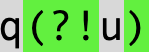
Matche a `q` that is followed by a `u`
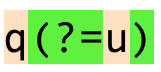

Positive <span style="color:blue">lookabehind</span> is defined with <span style="color:blue">(?<=REGEX)</span> while negative <span style="color:blue">lookabehind</span> is defined as <span style="color:blue">(?<!REGEX)</span>

In [33]:
import re
#Split sentence with .
text = """Fruits like apple, orange, and mango are healthy. But they are expensive 
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.
"""
sents = re.split(r"\.", text) # Add space here and see the effect
for sent in sents:
    print (sent) # What is the problem here?
print("===")    
# Find all words that are followed by , or .
# \w+ --> one or more words
#(?=,|\.) --> followed by , or . or !
p = re.compile("\w+(?=,|\.|!)")
print("Lookahead matches", p.findall(text))

Fruits like apple, orange, and mango are healthy
 But they are expensive 
($1
5/killo), i
e Mrs
 Bean can't afford them! However, One can order some online from www
rewe
de


===
Lookahead matches ['apple', 'orange', 'healthy', '1', 'i', 'Mrs', 'them', 'However', 'www', 'rewe', 'de']


In [34]:
# Sentence splitting using lookbehinde and lookahead
print("unsegmented text:", text)
print("===")  
# lookahead/lookbehind matchs
# (?<![A-Z][a-z]\.) --> If . is Not behind two characters (first cap, second small). Example  Mr. or Dr. is not end of sentence
# (?<=[\.|?|\!])\s+ --> If . is before one or more spaces
# After the space, the first character should be Capitalized
sents = re.split("(?<![A-Z][a-z]\.)(?<=[\.|?|\!])\s+(?=[A-Z])", text) 
for sent in sents:
    print (sent) 

unsegmented text: Fruits like apple, orange, and mango are healthy. But they are expensive 
($1.5/killo), i.e Mrs. Bean can't afford them! However, One can order some online from www.rewe.de.

===
Fruits like apple, orange, and mango are healthy.
But they are expensive 
($1.5/killo), i.e Mrs.
Bean can't afford them!
However, One can order some online from www.rewe.de.



##  <span style="color:red"> Excercise_2  ( 3pt)</span>
Modify the <span style="color:blue">regex</span> above for sentence segmentation so that the following text are split into correct sentences.
>```Fruits like apple, orange, and mango are health. But they are expensive, i.e Mr. Bean can't afford them! One can order some online from www.rewe.de. Prof. Karl, Dep. of Plant Science. Email: karl@plant.science.de. Regards! ```


In [5]:
import re
text = "Fruits like apple, orange, and mango are healthy. But they are expensive, i.e., Mr. Bean can't afford them! " \
       "One can order some online from www.rewe.de. Prof. Karl, Dep. of Plant Science. " \
       "Email: karl@plant.science.de. Regards!"
# Make pattern that splits sentences properly
pattern = r'(?<!Mr.)(?<!Prof.)(?<=[.?!])\s+(?=[A-Z])'
print(re.split(pattern, text))

['Fruits like apple, orange, and mango are healthy.', "But they are expensive, i.e., Mr. Bean can't afford them!", 'One can order some online from www.rewe.de.', 'Prof. Karl, Dep. of Plant Science.', 'Email: karl@plant.science.de.', 'Regards!']


## Word tokenization with regex
Word tokenization for English languages can be attained using white space characters. However, there are still special cases that need to be addressed. 


In [35]:
# English tokenization, 
tokens = re.split("(\w+|\$[\d\.]+|\S+)", text) 
for token in tokens:
    if token.strip():
        print (token) # Can you fix some of the issues?

Fruits
like
apple
,
orange
,
and
mango
are
healthy
.
But
they
are
expensive
($1.5/killo),
i
.e
Mrs
.
Bean
can
't
afford
them
!
However
,
One
can
order
some
online
from
www
.rewe.de.


##  <span style="color:red"> Excercise_2( 3pt)</span>
Modify/re-write the word tokenization pattern given above so that you can achieve near `ideal` tokenization for the following text
>```"I said, 'what're you? Crazy?'" said Sandowsky. "I can't afford to do that."```

See the ideal tokenization result from the `Exercise_2 - Ideal tokenization - file` in Moodle.

In [9]:
import re
text = "Fruits like apple, orange, and mango are healthy. But they are expensive, i.e., Mr. Bean can't afford them! " \
       "One can order some online from www.rewe.de. Prof. Karl, Dep. of Plant Science. " \
       "Email: karl@plant.science.de. Regards!"
# Make pattern that splits sentences properly
pattern = r'(?<=[\s.,;:"!?()])|(?=[\s.,;:"!?()])'
print(re.split(pattern, text))

['Fruits', ' ', 'like', ' ', 'apple', ',', ' ', 'orange', ',', ' ', 'and', ' ', 'mango', ' ', 'are', ' ', 'healthy', '.', ' ', 'But', ' ', 'they', ' ', 'are', ' ', 'expensive', ',', ' ', 'i', '.', 'e', '.', ',', ' ', 'Mr', '.', ' ', 'Bean', ' ', "can't", ' ', 'afford', ' ', 'them', '!', ' ', 'One', ' ', 'can', ' ', 'order', ' ', 'some', ' ', 'online', ' ', 'from', ' ', 'www', '.', 'rewe', '.', 'de', '.', ' ', 'Prof', '.', ' ', 'Karl', ',', ' ', 'Dep', '.', ' ', 'of', ' ', 'Plant', ' ', 'Science', '.', ' ', 'Email', ':', ' ', 'karl@plant', '.', 'science', '.', 'de', '.', ' ', 'Regards', '!', '']


## Tokenization with NLTK
NLTK includes  tokenizers for different languages

In [8]:
import nltk
sentence = "These are simply sentences obtained from the treminals."
tokens = nltk.word_tokenize(sentence, language='english')
print(tokens)
sentence2 = """
Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei. 
Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet. Am Boden schadet 
das Gas der Gesundheit erheblich."""
tokens2 = nltk.word_tokenize(sentence2, language='german')
print (tokens2)

['These', 'are', 'simply', 'sentences', 'obtained', 'from', 'the', 'treminals', '.']
['Die', 'Brände', 'in', 'Brasilien', 'setzen', 'erhebliche', 'Mengen', 'an', 'klimaschädlichen', 'Treibhausgasen', 'frei', '.', 'Die', 'Nasa', 'hat', 'nun', 'simuliert', ',', 'wie', 'sich', 'Kohlenmonoxid', 'über', 'Südamerika', 'ausbreitet', '.', 'Am', 'Boden', 'schadet', 'das', 'Gas', 'der', 'Gesundheit', 'erheblich', '.']


## Stemmer in NLTK
<span style="color:blue">Stemming</span> tries to remove or chops off the end of a word to reduce the word to its base form, somehow a crude approach.

Different stemmers use different rules. 

In [7]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(token) for token in tokens]


NameError: name 'nltk' is not defined

In [ ]:
[lancaster.stem(token) for token in tokens]

In [6]:
#Example from: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding",
             "railroad","moonlight","football","ill","illness","sick","sickness","hope"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   


NameError: name 'porter' is not defined

In [ ]:
#CISTEM Stemmer for German
de_stem = nltk.stem.cistem.Cistem()
#Show the top 6 stems from the list
[de_stem.stem(t) for t in tokens2][:6]

## Tokenization spaCy

In [ ]:
import spacy
spacy = spacy.load('en_core_web_sm')
doc = spacy(text)
print("{0:15}{1:15}".format("Token","Lemma"))
for token in doc:
    # print the token and its lemma
    print("{0:15}{1:15}".format(token.text, token.lemma_)) #How does it compare with the tokens in the regex and NLTK?

In [ ]:
for sent in doc.sents:
    print (sent) #How does it compare with the sentences in the regex and NLTK?

## Lemmatization
A lemma is the canonical, `uninflected` or `dictionary form` of a word. For example, the lemma of `smallest` is `small,` and the lemma of `eating` is `eat.` In many languages, the lemma for nouns is the `nominative singula`r form, the lemma for adjectives is the ``nominative singular`` positive form, and the lemma for verbs is the `infinitive.` But given an inflected form, finding the lemma (a process called `lemmatization`) is not always as easy. Words often undergo regular spelling changes when inflected for example, in English, verbs and adjectives ending in -e often drop this letter when inflecting: `bake → baking`. Sometimes final consonants are doubled, as in (British) English `travel → travelling`. 

An accurate algorithm for lemmatization must be aware of these sorts of inflectional rules and know how to undo them to arrive at the `base form` of the word. It must also know about completely irregular cases, such as `go → went`, `mouse → mice`, and `good → better`. Lemmatization is a difficult task for computers, and requires some basic understanding of the grammatical context and properties of the word. For example, the lemma of `dove` depends on whether the word is being used as a noun (as in the `bird`) or a verb (as in the past tense of `dive`). However, lemmatization is an important task because, as with part-of-speech tagging, many NLP applications rely on lemmatized text.

Examples of lemmatization:
>```rocks : rock
corpora : corpus
better : good

## NLTK Lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
# Lemmatize using WordNet's buil-in morphy function
# Returns the input unchanged if it cannot be found in WordNet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
#Give the POS tag as a context to the tager,  a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 
#Lemmatizing sentence
sentence = "The striped bats are hanging on their feet for best"
word_list = nltk.word_tokenize(sentence)
print("words:",word_list)
# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print("lemma:",lemmatized_output)

## spaCy Lemmatizzer

In [ ]:
import spacy
# Initialize spacy 'en_core_web_sm' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
sentence = "The striped bats are hanging on their feet for best"
# Parse the sentence using the loaded 'English' model object `nlp`
doc = nlp(sentence)
# Extract the lemma for each token and join
" ".join(["[" + token.lemma_ + "]" for token in doc])

## TextBlob Lemmatizer

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob, Word
# Lemmatize a word, use the WordNet's morphy function
word = 'stripes'
w = Word(word)
w.lemmatize()

In [ ]:
# Lemmatize a sentence
sentence = "The striped bats are hanging on their feet for best"
sent = TextBlob(sentence)
" ". join(["["+ w.lemmatize()+"]" for w in sent.words])

## Parts of speech tagging with NLTK
Part-of-speech tagging (POS tagging) is the process of marking up the words in a text with their corresponding part of speech (e.g., `noun, verb, adjective`). For example, take the following sentence:


 <span style="color:blue">A dog had seen the cutest ferrets.` 
 
A tokenizer would split it into the following tokens:
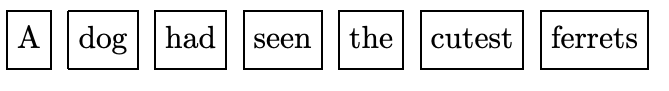
A part-of-speech tagger could then assign labels, or tags, to the tokens according to their respective
parts of speech:
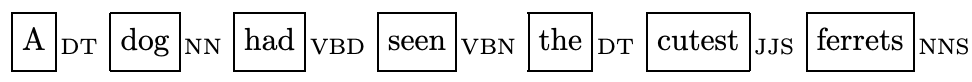
The `Penn Treebank tags` used here are as follows:
`DT` determiner `NN` noun, singular or mass `VBD` verb, past tense
`JJS` adjective, superlative `NNS` noun, plural `VBN` verb, past participle

The inventory from which these POS tags are drawn varies from `language to language`, and from `application to application`.

NLTK includes a Part-of-speech tagger, which assign a <span style="color:blue">tag</span>, or <span style="color:blue">word class</span>, or <span style="color:blue">lexical category</span> for a given token in a text. The default POS tagset for English is based on [<span style="color:blue">PennTreebank tagset</span>](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 

NLTK also include the [<span style="color:blue">Universal POS tagset</span>](https://universaldependencies.org/u/pos/)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
import nltk
nltk.download('tagsets')
text = "I saw a man sawing the tree with a saw. He can't finish it ontime."
sentences = sent_tokenize(text)
print("tagged", pos_tag(word_tokenize(sentences[0])))
print("=====")
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence)):
        print(token, pos)
# to get information about a given tag
print("=====")
nltk.help.upenn_tagset("VB")

In [ ]:
# you can also decide to use the Universal POS tagset
nltk.download('universal_tagset')
print("{0:15}{1:15}".format("Token","POS tag"))
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence), tagset='universal'):
        print("{0:15}{1:15}".format(token, pos) )

## WordNet Lemmatizer with appropriate POS tag

wordnet pos tags are: noun (n), verb(v) , adj(a) and adv (r)

In [ ]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
# wordnet pos tags are: noun (n), verb(v) , adj(a) and adv (r)
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])


## Part of speech tagging with spaCy

In [ ]:
import spacy 
import pprint
# Load English tokenizer, tagger,  
# parser, NER and word vectors 
nlp = spacy.load("en_core_web_sm") 
text = ("I saw a man sawing the tree with a saw. He can't finish it ontime!") 
doc = nlp(text) 
# Print token and Tag 
for token in doc: 
    print(token, token.pos_) 
# Example list of Verb tokens 
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"]) 

## Part of speech tagging with TextBlob

In [ ]:
!pip install -U textblob

In [ ]:
!python -m textblob.download_corpora

In [ ]:
from textblob import TextBlob 
text = ("I saw a man sawing the tree with a saw. He can't finish it ontime!")   
# create a textblob object 
blob_object = TextBlob(text) 
# print word with pos tag. 
print(blob_object.tags) 

## TextBlob Lemmatizer with appropriate POS tag

In [ ]:
#Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = ["["+wd.lemmatize(tag) +"]" for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)
# Lemmatize
sentence = "The striped bats are hanging on their feet for best"
lemmatize_with_postag(sentence)

##  <span style="color:red"> Excercise_3 ( 3pt)</span>
### Lemmatization for German
There is no lemmatization library in NLTK for German. However, the [<span style="color:blue">GermaLemma</span>](https://github.com/WZBSocialScienceCenter/germalemma) (https://github.com/WZBSocialScienceCenter/germalemma) library is an open source lemmatizer for German. To lemmatize a word, you need to pass the POS tag as a secondary argument. In this exercise, you can use the POS tagger for German from <span style="color:blue">pattern.de</span> but then you have to convert tags into `N`, `V`, `ADJ`, or `ADV`. So your task is, when the word category is in one of the four tags, map them and pass to the lematizer. If the POS tag is not in the four categories, return the word itself as the lemma. See the cells below on how to execute the lemmatizer and pos tager for German. 

You can install <span style="color:blue">GermaLemma</span> as
>```pip install -U germalemma```

Also make sure mysql and related packages are installed


In [ ]:
#uncomment the following for Mysql cleint dev in Linux
# !sudo apt install default-libmysqlclient-dev
# Installing GermaLemma
!pip install -U germalemma

In [11]:
# POS taggin for German (ISSUE - run this cell multiple times if it raises exceptions)
from germalemma import GermaLemma
from pattern.de import parse, split
s = parse('Die Katze liegt auf der Matte.')
for sentence in split(s):
    for token in sentence:
        print (token, token.pos)

Die DT
Katze NN
liegt VB
auf IN
der DT
Matte NN
. .


## Address the `TODO` part below to complete your exercise

In [12]:
# Lemmatizer for German using GermaLemma lematizer - 
#(ISSUE - run this cell multiple times, it may happen that it raises exceptions)

sentence2 = """Die Brände in Brasilien setzen erhebliche Mengen an klimaschädlichen Treibhausgasen frei. 
Die Nasa hat nun simuliert, wie sich Kohlenmonoxid über Südamerika ausbreitet.
Am Boden schadet das Gas der Gesundheit erheblich."""
de_lemma = GermaLemma()
# POS tagger
poses = parse(sentence2)
for sentence in split(poses):
    print ("===")
    for token in sentence:
        # print(token, token.pos)
        # TODO: Here map the POS tag to V, N, ADJ, or ADV as MAPD_POS. MAPD_POS = ???
        # If the POS tag is not in V, N, ADJ, or ADV, no need to lemmatize
        if token.pos in ['NN', 'NNS', 'NNP']:
            mapped_pos = 'N'
        elif token.pos in ['V', 'VB']:
            mapped_pos = 'V'
        elif token.pos in ['JJ']:
            mapped_pos = 'ADJ'
        elif token.pos in ['IN']:
            mapped_pos = 'ADV'
        else:
            mapped_pos = token
        # Print the lemma here
        if mapped_pos in ['N', 'V', 'ADJ', 'ADV']:
            print(de_lemma.find_lemma(str(token), mapped_pos), mapped_pos)
        else:
            print(token)
    print ("===")
#

===
Die
Brand N
in ADV
Brasilien N
setzen V
erheblich ADJ
Menge N
an ADV
klimaschädlich ADJ
Treibhausgas N
frei ADJ
.
===
===
Die
Nasa N
haben V
nun ADV
Simuliert N
,
wie ADV
sich
Kohlenmonoxid N
über ADV
Südamerika N
Ausbreitet N
.
===
===
am ADV
Boden N
schaden V
das
Gas N
der
Gesundheit N
erheblich ADJ
.
===


## Resources
* [HTTP request](https://realpython.com/python-requests/)
* [Regex](https://www.programiz.com/python-programming/regex)
* [Regex lookahead and lookbehind](https://www.regular-expressions.info/lookaround.html)
* [BeautifulSoup tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Online Regex editor](https://regex101.com/r/nG1gU7/)
* [Processing Raw Text NLTK](https://www.nltk.org/book/ch03.html)
* [Different Stemmers in NLTK](https://www.nltk.org/api/nltk.stem.html)
* [German lemmatizer](https://github.com/WZBSocialScienceCenter/germalemma)